# RAG

### ENV

In [11]:
import os
os.environ["OPENAI_BASE_URL"] = "https://api.openai-proxy.org/v1"
os.environ["OPENAI_API_KEY"] = "sk-660BMZI5WRTfL2XFM2ykCvJMbYiKYXahc4p98vPFxMzKf5jS"

### 1 Loader

##### ÊñáÂ≠óPDFLoader

In [19]:
from langchain_community.document_loaders import PyPDFLoader
file_path = 'asset/PDFLoader.pdf'
loader = PyPDFLoader(file_path)
# ÂºÇÊ≠•Âä†ËΩΩ PDF ÁöÑÊØè‰∏ÄÈ°µ
pages = []
async for page in loader.alazy_load():
    pages.append(page)
print(f"Total pages loaded: {len(pages)}")
print(pages[0].metadata)
print(pages[0].page_content)

Total pages loaded: 1
{'producer': 'Microsoft¬Æ Word LTSC', 'creator': 'Microsoft¬Æ Word LTSC', 'creationdate': '2025-08-13T17:42:42+08:00', 'author': 'Ë∂Ö‰∏ñ È≤Å', 'moddate': '2025-08-13T17:42:42+08:00', 'source': 'asset/PDFLoader.pdf', 'total_pages': 1, 'page': 0, 'page_label': '1'}
1. ËΩ¶ÁâåËØÜÂà´ 
ÈááÁî®‚ÄúÊ£ÄÊµã+ËØÜÂà´‚Äù‰∏§Èò∂ÊÆµÊñπÊ°à„ÄÇÈÄöËøáÈ´òÊÄßËÉΩÁõÆÊ†áÊ£ÄÊµãÊ®°ÂûãÂÆö‰ΩçËΩ¶ÁâåÂå∫ÂüüÔºåÁªì
Âêà‰∏ìÁî®OCR Ê®°ÂûãÂÆûÁé∞Â≠óÁ¨¶Ëß£Êûê„ÄÇÁ≥ªÁªüÂÖºÈ°æÁ≤æÂ∫¶‰∏éÊïàÁéáÔºåÂèØÈÄÇÈÖçÂµåÂÖ•ÂºèÂèäËæπÁºòËÆ°
ÁÆóÂú∫ÊôØ„ÄÇ 
2. Êó†‰∫∫Êú∫ÂØÜÈõÜ‰∫∫ÂëòËÆ°Êï∞ 
ÈíàÂØπÈ´òÁ©∫ËßÜËßí‰∏ãÁõÆÊ†áÂ∞è„ÄÅÂØÜÂ∫¶È´ò„ÄÅÁéØÂ¢ÉÂ§çÊùÇÁ≠âÈóÆÈ¢òÔºåÈááÁî®Â∞èÁõÆÊ†áÂ¢ûÂº∫ÊäÄÊúØ
ÊèêÂçáÊ£ÄÊµãËÉΩÂäõÔºåÁªìÂêàÂ§öÊ®°ÊÄÅÊï∞ÊçÆËûçÂêàÔºàÂ¶ÇÂèØËßÅÂÖâ‰∏éÁ∫¢Â§ñÔºâÂ¢ûÂº∫Â§úÈó¥ÂíåÂ§çÊùÇÂ§©Ê∞î
‰∏ãÁöÑÈ≤ÅÊ£íÊÄß„ÄÇÈÄöËøáËæπÁºò-‰∫ëÁ´ØÂçèÂêåÊû∂ÊûÑ‰øùÈöúÂÆûÊó∂ÊÄßÔºåÂπ∂Êé¢Á¥¢Â§öÊú∫ÂçèÂêå‰∏éÂä®ÊÄÅÈ¢ÑÊµã
ËÉΩÂäõ„ÄÇ 
3. ÊºÇÊµÆÁâ©„ÄÅÁÅ´Ê∫ê„ÄÅËΩ¶ËæÜÁ±ªÂûãËØÜÂà´ 
ÊºÇÊµÆÁâ©ÔºöÂü∫‰∫éÈ´òÂàÜËæ®ÁéáÊÑüÁü•‰∏éÂ∞èÁõÆÊ†á‰ºòÂåñÊ®°ÂûãËøõË°åÊ£ÄÊµãÔºåÁªìÂêàË∑üË∏™‰∏é

#### Â§öÊ®°ÊÄÅÊ®°ÂûãËß£ÊûêPDF

In [20]:
import base64
import io, pymupdf

from PIL import Image

def pdf_page_to_base64(pdf_path: str, page_number: int):
    pdf_document = pymupdf.open(pdf_path) # open a document
    page = pdf_document.load_page(page_number - 1)  # input is one-indexed
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    buffer = io.BytesIO()
    img.save(buffer, format="PNG")

    return base64.b64encode(buffer.getvalue()).decode("utf-8")

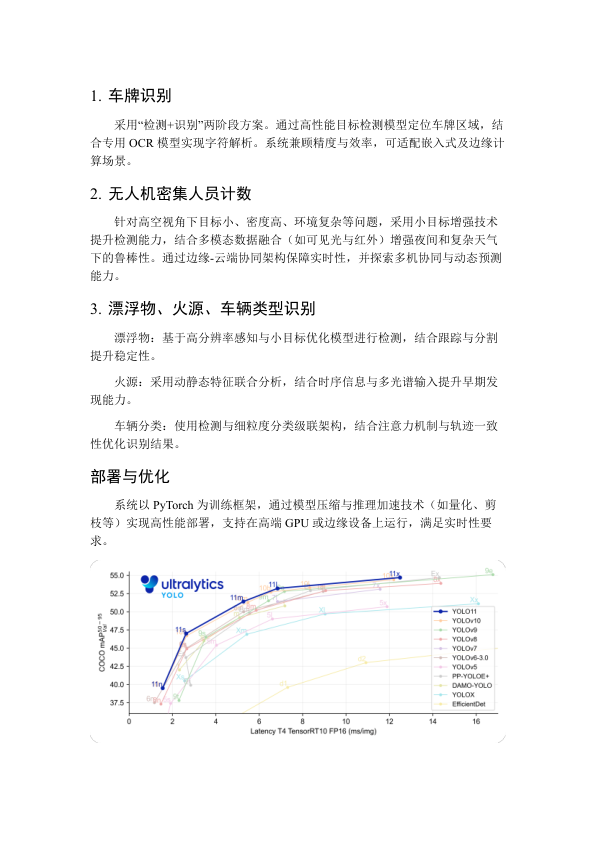

In [21]:
from IPython.display import Image as IPImage
from IPython.display import display
file_path = "asset/PDFLoader.pdf"
base64_image = pdf_page_to_base64(file_path, 1)
display(IPImage(data=base64.b64decode(base64_image)))

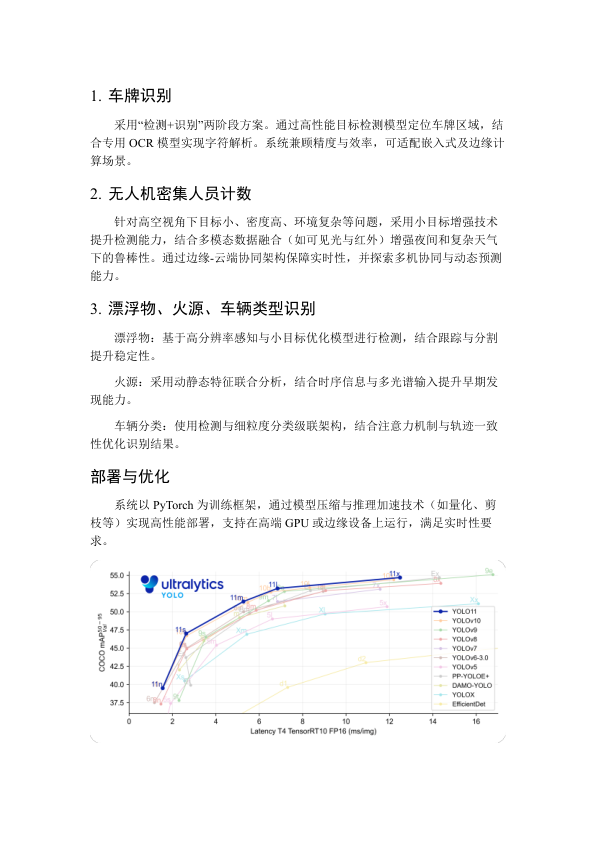

In [22]:
base64_image = pdf_page_to_base64(file_path, 1)
display(IPImage(data=base64.b64decode(base64_image)))

from langchain_openai import ChatOpenAI
import os

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

In [23]:
from langchain_core.messages import HumanMessage

query = "Â¶Ç‰ΩïËΩ¶ÁâåËØÜÂà´"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ]
)

response = llm.invoke([message])
print(response.content)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


ËΩ¶ÁâåËØÜÂà´ÊòØ‰∏ÄÁßçÂà©Áî®ËÆ°ÁÆóÊú∫ËßÜËßâÂíåÊ∑±Â∫¶Â≠¶‰π†ÊäÄÊúØÊù•Ëá™Âä®ËØÜÂà´ËΩ¶ËæÜÁâåÁÖß‰ø°ÊÅØÁöÑÊäÄÊúØ„ÄÇ‰ª•‰∏ãÊòØËΩ¶ÁâåËØÜÂà´ÁöÑ‰∏Ä‰∫õÂÖ≥ÈîÆÊ≠•È™§ÂíåÊäÄÊúØË¶ÅÁÇπÔºö

1. **ÂõæÂÉèÈááÈõÜ**Ôºö‰ΩøÁî®ÊëÑÂÉèÂ§¥ÊàñÂÖ∂‰ªñÂõæÂÉèÈááÈõÜËÆæÂ§áËé∑ÂèñËΩ¶ËæÜÁöÑÂõæÂÉèÔºåÁ°Æ‰øùÂõæÂÉèÊ∏ÖÊô∞‰∏îÂÖâÁÖßÊù°‰ª∂ËâØÂ•Ω„ÄÇ

2. **È¢ÑÂ§ÑÁêÜ**ÔºöÂØπÈááÈõÜÂà∞ÁöÑÂõæÂÉèËøõË°åÈ¢ÑÂ§ÑÁêÜÔºåÂåÖÊã¨ÂéªÂô™„ÄÅÂ¢ûÂº∫ÂØπÊØîÂ∫¶„ÄÅË∞ÉÊï¥‰∫ÆÂ∫¶Á≠âÔºå‰ª•ÊèêÈ´òÂêéÁª≠Â§ÑÁêÜÁöÑÂáÜÁ°ÆÊÄß„ÄÇ

3. **ËΩ¶ÁâåÂÆö‰Ωç**ÔºöÈÄöËøáÂõæÂÉèÂ§ÑÁêÜÁÆóÊ≥ïÔºàÂ¶ÇËæπÁºòÊ£ÄÊµã„ÄÅËΩÆÂªìÊèêÂèñÁ≠âÔºâÂÆö‰ΩçËΩ¶ÁâåÂú®ÂõæÂÉè‰∏≠ÁöÑ‰ΩçÁΩÆ„ÄÇÂèØ‰ª•‰ΩøÁî®Ê∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàÂ¶ÇYOLO„ÄÅSSDÁ≠âÔºâËøõË°åÁõÆÊ†áÊ£ÄÊµã„ÄÇ

4. **Â≠óÁ¨¶ÂàÜÂâ≤**ÔºöÂú®ÂÆö‰ΩçÂà∞ËΩ¶ÁâåÂå∫ÂüüÂêéÔºåËøõ‰∏ÄÊ≠•ÂØπËΩ¶Áâå‰∏≠ÁöÑÂ≠óÁ¨¶ËøõË°åÂàÜÂâ≤Ôºå‰ª•‰æøÂêéÁª≠ÁöÑÂ≠óÁ¨¶ËØÜÂà´„ÄÇ

5. **Â≠óÁ¨¶ËØÜÂà´**Ôºö‰ΩøÁî®OCRÔºàÂÖâÂ≠¶Â≠óÁ¨¶ËØÜÂà´ÔºâÊäÄÊúØÂØπÂàÜÂâ≤Âá∫ÁöÑÂ≠óÁ¨¶ËøõË°åËØÜÂà´„ÄÇÂèØ‰ª•‰ΩøÁî®Ê∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÔºàÂ¶ÇCNNÔºâÊù•ÊèêÈ´òËØÜÂà´ÁöÑÂáÜÁ°ÆÁéá„ÄÇ

6. **ÁªìÊûúËæìÂá∫**ÔºöÂ∞ÜËØÜÂà´Âá∫ÁöÑËΩ¶Áâå‰ø°ÊÅØËøõË°å

#### WebBaseLoader

In [24]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# ÁõÆÊ†áÁΩëÈ°µ URL
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"

# ÂàõÂª∫ WebBaseLoader ÂÆû‰æã
loader = WebBaseLoader(web_paths=[page_url])

# Âä†ËΩΩÁΩëÈ°µÂÜÖÂÆπ
docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

# Á°Æ‰øùÂä†ËΩΩÁöÑÊñáÊ°£Êï∞Èáè‰∏∫ 1
assert len(docs) == 1

# Ëé∑ÂèñÁ¨¨‰∏Ä‰∏™ÊñáÊ°£
doc = docs[0]
print(doc)

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  4.85it/s]

page_content='




How to add memory to chatbots | ü¶úÔ∏èüîó LangChain








Skip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL dataSummarize TextHow-to guidesHow-to guidesHow to use tools in a chainHow to use a vectorstore as a retrieverHow to add memory to chatbotsHow to use example selectorsHow to add a semantic layer over graph databaseHow to invoke runnables in parallelHow to stream chat model

#### UnstructuredLoader

In [25]:
from langchain_unstructured import UnstructuredLoader

# Ê∫êÁΩëÈ°µ URL
page_url = "https://python.langchain.com/docs/how_to/chatbots_memory/"
loader = UnstructuredLoader(web_url=page_url) # ËøôÈáå‰∏ÄÂÆöË¶ÅÊåáÂÆö web_url=xxx

docs = []
async for doc in loader.alazy_load():
    docs.append(doc)

for doc in docs:
    print(doc.page_content)

Open In Colab
Open on GitHub
How to add memory to chatbots
A key feature of chatbots is their ability to use the content of previous conversational turns as context. This state management can take several forms, including:
Simply stuffing previous messages into a chat model prompt.
The above, but trimming old messages to reduce the amount of distracting information the model has to deal with.
More complex modifications like synthesizing summaries for long running conversations.
We'll go into more detail on a few techniques below!
note
This how-to guide previously built a chatbot using RunnableWithMessageHistory. You can access this version of the guide in the v0.2 docs.
As of the v0.3 release of LangChain, we recommend that LangChain users take advantage of LangGraph persistence to incorporate memory into new LangChain applications.
If your code is already relying on RunnableWithMessageHistory or BaseChatMessageHistory, you do not need to make any changes. We do not plan on deprecating

### 2 ÂµåÂÖ•Ê®°Âûã

#### OpenAIEmbeddings

In [26]:
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()
embeddings = embeddings_model.embed_documents(
    [
        "Hi there!",
        "Oh hello"
        "What is your name?",
    ]
)
len(embeddings), len(embeddings[0])
print(embeddings[0])


INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[-0.020325319841504097, -0.007096723187714815, -0.022839006036520004, -0.026279456913471222, -0.037527572363615036, 0.02163294516503811, -0.006144568789750338, -0.008975640870630741, 0.008524954319000244, -0.016618264839053154, 0.02683805488049984, -0.007356978487223387, -0.013545980677008629, -0.024133935570716858, 0.006512735038995743, -0.020198365673422813, 0.02426088973879814, -0.014739347621798515, 0.016427835449576378, -0.01647861674427986, -0.007204633671790361, -0.008080615662038326, 0.004694120492786169, -0.002066174754872918, -0.014802824705839157, -0.005989050026983023, -0.0020868047140538692, -0.02301674149930477, 0.019855590537190437, -0.031535349786281586, 0.012860430404543877, 0.011622629128396511, -0.008518606424331665, -0.009477108716964722, -0.001813853858038783, -0.027422042563557625, -0.008264699019491673, 0.002078870078548789, 0.024006983265280724, -0.008734428323805332, 0.02349916659295559, 0.0009116876753978431, 0.009769102558493614, -0.01388875674456358, -0.0173

In [27]:
query_embedding = embeddings_model.embed_query("What is the capital of France?")
print(len(query_embedding), query_embedding)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


1536 [0.024510186165571213, -0.011081933975219727, -0.0013095540925860405, -0.0252922922372818, -0.017471233382821083, 0.015541198663413525, -0.015806104987859726, -0.006742508616298437, 0.0016572442837059498, -0.03451357036828995, 0.019174207001924515, 0.00862208567559719, -0.018720081076025963, -0.016979264095425606, -0.015049229376018047, -0.0023273953702300787, 0.024308351799845695, -0.020990710705518723, 0.010211526416242123, -0.019186820834875107, -0.005159375257790089, 0.0005341498763300478, 0.0016982418019324541, 0.011763122864067554, 0.007739062886685133, -0.01817765273153782, 0.005745954345911741, -0.0236902367323637, 0.014822166413068771, -0.02059965766966343, 0.012362317182123661, 0.007001108024269342, -0.02097809500992298, -0.011725279502570629, -0.016335919499397278, 0.007001108024269342, -0.009688019752502441, -0.01700449362397194, 0.005790105555206537, -0.012456926517188549, 0.03395852819085121, 0.01374992448836565, -0.009214972145855427, -0.007770599331706762, -0.01374

 #### ÁºìÂ≠ò

In [28]:
from langchain_community.vectorstores import Milvus, FAISS, Chroma
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import LocalFileStore

import os

In [29]:
# ‰ΩøÁî®Êõ¥ÂÆâÂÖ®ÁöÑ SHA-256 ‰Ωú‰∏∫ÁºìÂ≠òÈîÆÁºñÁ†ÅÂô®ÔºåÈÅøÂÖçÈªòËÆ§ SHA-1 ÁöÑÁ¢∞ÊíûÈ£éÈô©
import hashlib
from typing import Union

def sha256_key_encoder(payload: Union[str, bytes]) -> str:
    if isinstance(payload, str):
        payload = payload.encode("utf-8")
    return hashlib.sha256(payload).hexdigest()

In [30]:
underlying_embeddings = OpenAIEmbeddings() # Â∫ïÂ±ÇÂµåÂÖ•
# store = LocalFileStore("cache") # ÁºìÂ≠òÂ≠òÂÇ®
# store = LocalFileStore("cache", cache_type="memory") # ÂÜÖÂ≠òÁºìÂ≠ò
# ÊóãËΩ¨Âà∞Êñ∞ÁöÑÁºìÂ≠òË∑ØÂæÑÔºåÈÅøÂÖç‰∏éÊóßÁöÑ SHA-1 ÈîÆÂÜ≤Á™Å
langchain_cache_dir = os.path.join(os.getcwd(), "tmp", "langchain_cache_sha256")
store = LocalFileStore(langchain_cache_dir)

cache_embeddings = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings=underlying_embeddings,
    document_embedding_cache=store,
    # namespace=underlying_embeddings.model, # ‰∏çÊîØÊåÅnamespace
    key_encoder=sha256_key_encoder,
)
list(store.yield_keys())

['13350a9c9ddc85d102eca31c9625a076e5b385ff017170616423991303c45c37',
 'd18091a0f3b3c953c292e991cb8cda4db4b883966a69741ed9b68ddebeb43963']

In [31]:
raw_documents = TextLoader('asset/TextLoader.txt', encoding='utf-8').load()
text_splitter = CharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0,  # ËÆæÁΩÆÈáçÂè†Â§ßÂ∞è
    )
documents = text_splitter.split_documents(raw_documents)

In [32]:
%%time
db = FAISS.from_documents(documents, cache_embeddings)

CPU times: total: 0 ns
Wall time: 1e+03 Œºs


In [33]:
%%time
db2 =  FAISS.from_documents(documents, cache_embeddings)

CPU times: total: 0 ns
Wall time: 3.01 ms


### 3 ÂêëÈáèÊï∞ÊçÆÂ∫ì

#### InMemoryVectorStore

In [34]:
from langchain_openai import OpenAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_core.documents import Document
import os

In [35]:
embeddings_model = OpenAIEmbeddings()
# ‰∏∫‰∫ÜÊºîÁ§∫Êñπ‰æøÊàë‰ª¨ÂºïÂÖ•‰∏Ä‰∏™ÂÜÖÂ≠òÂêëÈáèÊï∞ÊçÆÂ∫ìÔºåÂÆÉÂ∞ÜÂêëÈáèÊöÇÂ≠òÂú®ÂÜÖÂ≠ò‰∏≠ÔºåÂπ∂‰ΩøÁî®Â≠óÂÖ∏‰ª•ÂèänumpyËÆ°ÁÆóÊêúÁ¥¢ÁöÑ‰ΩôÂº¶Áõ∏‰ººÂ∫¶„ÄÇ
vector_store = InMemoryVectorStore(embedding=embeddings_model)

document_1 = Document(
    page_content="This is the content of document 1.",
    metadata={"source": "Á§æ‰∫§Â™í‰Ωì"}
)
document_2 = Document(
    page_content="ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê",
    metadata={"source": "Êú¨Âú∞"}
)
documents = [document_1, document_2]

# Â≠òÂÇ®
# vector_store.add_documents(documents)
# ‰∏∫Ê∑ªÂä†ÁöÑÊñáÊ°£Â¢ûÂä†IDÁ¥¢ÂºïÔºå‰æø‰∫éÂêéÈù¢ÁÆ°ÁêÜ
vector_store.add_documents(documents, ids=["doc1", "doc2"]  )

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


['doc1', 'doc2']

In [36]:
# Âà†Èô§
# vector_store.delete(ids=["doc1"])
# get_by_ids
print(vector_store.get_by_ids(["doc1"]))
print(vector_store.get_by_ids(["doc1", "doc2"]))

[Document(id='doc1', metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}, page_content='This is the content of document 1.')]
[Document(id='doc1', metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}, page_content='This is the content of document 1.'), Document(id='doc2', metadata={'source': 'Êú¨Âú∞'}, page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê')]


In [37]:
# ‰ΩøÁî® query ËøõË°åÁõ∏‰ººÂ∫¶ÊêúÁ¥¢
docs = vector_store.similarity_search("document")
print(docs)
docs = vector_store.similarity_search("ÊùØÂ≠ê")
print(docs)
# ‰ΩøÁî® query ËΩ¨ÂåñÁöÑÂêëÈáè ËøõË°åÁõ∏‰ººÂ∫¶ÊêúÁ¥¢
embeddings_query = embeddings_model.embed_query("ÊùØÂ≠ê")
docs = vector_store.similarity_search_by_vector(embeddings_query)
print(docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(id='doc1', metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}, page_content='This is the content of document 1.'), Document(id='doc2', metadata={'source': 'Êú¨Âú∞'}, page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê')]


INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(id='doc2', metadata={'source': 'Êú¨Âú∞'}, page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê'), Document(id='doc1', metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}, page_content='This is the content of document 1.')]


INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(id='doc2', metadata={'source': 'Êú¨Âú∞'}, page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê'), Document(id='doc1', metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}, page_content='This is the content of document 1.')]


#### Pinecone

In [38]:
# ‰ΩøÁî® Pinecone
from pinecone import Pinecone, ServerlessSpec
pc = Pinecone(api_key="pcsk_7RfinG_4CcwpfWgW5YwzTSzo5MbU83afCvxLBAp4qiTHd7o1fyxcDVoKYePt3jPfi2yNSs")

index_name = "developer-quickstart-py"

if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "chunk_text"}
        }
    )

In [39]:
records = [
    { "_id": "rec1", "chunk_text": "The Eiffel Tower was completed in 1889 and stands in Paris, France.", "category": "history" },
    { "_id": "rec2", "chunk_text": "Photosynthesis allows plants to convert sunlight into energy.", "category": "science" },
    { "_id": "rec3", "chunk_text": "Albert Einstein developed the theory of relativity.", "category": "science" },
    { "_id": "rec4", "chunk_text": "The mitochondrion is often called the powerhouse of the cell.", "category": "biology" },
    { "_id": "rec5", "chunk_text": "Shakespeare wrote many famous plays, including Hamlet and Macbeth.", "category": "literature" },
    { "_id": "rec6", "chunk_text": "Water boils at 100¬∞C under standard atmospheric pressure.", "category": "physics" },
    { "_id": "rec7", "chunk_text": "The Great Wall of China was built to protect against invasions.", "category": "history" },
    { "_id": "rec8", "chunk_text": "Honey never spoils due to its low moisture content and acidity.", "category": "food science" },
    { "_id": "rec9", "chunk_text": "The speed of light in a vacuum is approximately 299,792 km/s.", "category": "physics" },
    { "_id": "rec10", "chunk_text": "Newton's laws describe the motion of objects.", "category": "physics" },
    { "_id": "rec11", "chunk_text": "The human brain has approximately 86 billion neurons.", "category": "biology" },
    { "_id": "rec12", "chunk_text": "The Amazon Rainforest is one of the most biodiverse places on Earth.", "category": "geography" },
    { "_id": "rec13", "chunk_text": "Black holes have gravitational fields so strong that not even light can escape.", "category": "astronomy" },
    { "_id": "rec14", "chunk_text": "The periodic table organizes elements based on their atomic number.", "category": "chemistry" },
    { "_id": "rec15", "chunk_text": "Leonardo da Vinci painted the Mona Lisa.", "category": "art" },
    { "_id": "rec16", "chunk_text": "The internet revolutionized communication and information sharing.", "category": "technology" },
    { "_id": "rec17", "chunk_text": "The Pyramids of Giza are among the Seven Wonders of the Ancient World.", "category": "history" },
    { "_id": "rec18", "chunk_text": "Dogs have an incredible sense of smell, much stronger than humans.", "category": "biology" },
    { "_id": "rec19", "chunk_text": "The Pacific Ocean is the largest and deepest ocean on Earth.", "category": "geography" },
    { "_id": "rec20", "chunk_text": "Chess is a strategic game that originated in India.", "category": "games" },
    { "_id": "rec21", "chunk_text": "The Statue of Liberty was a gift from France to the United States.", "category": "history" },
    { "_id": "rec22", "chunk_text": "Coffee contains caffeine, a natural stimulant.", "category": "food science" },
    { "_id": "rec23", "chunk_text": "Thomas Edison invented the practical electric light bulb.", "category": "inventions" },
    { "_id": "rec24", "chunk_text": "The moon influences ocean tides due to gravitational pull.", "category": "astronomy" },
    { "_id": "rec25", "chunk_text": "DNA carries genetic information for all living organisms.", "category": "biology" },
    { "_id": "rec26", "chunk_text": "Rome was once the center of a vast empire.", "category": "history" },
    { "_id": "rec27", "chunk_text": "The Wright brothers pioneered human flight in 1903.", "category": "inventions" },
    { "_id": "rec28", "chunk_text": "Bananas are a good source of potassium.", "category": "nutrition" },
    { "_id": "rec29", "chunk_text": "The stock market fluctuates based on supply and demand.", "category": "economics" },
    { "_id": "rec30", "chunk_text": "A compass needle points toward the magnetic north pole.", "category": "navigation" },
    { "_id": "rec31", "chunk_text": "The universe is expanding, according to the Big Bang theory.", "category": "astronomy" },
    { "_id": "rec32", "chunk_text": "Elephants have excellent memory and strong social bonds.", "category": "biology" },
    { "_id": "rec33", "chunk_text": "The violin is a string instrument commonly used in orchestras.", "category": "music" },
    { "_id": "rec34", "chunk_text": "The heart pumps blood throughout the human body.", "category": "biology" },
    { "_id": "rec35", "chunk_text": "Ice cream melts when exposed to heat.", "category": "food science" },
    { "_id": "rec36", "chunk_text": "Solar panels convert sunlight into electricity.", "category": "technology" },
    { "_id": "rec37", "chunk_text": "The French Revolution began in 1789.", "category": "history" },
    { "_id": "rec38", "chunk_text": "The Taj Mahal is a mausoleum built by Emperor Shah Jahan.", "category": "history" },
    { "_id": "rec39", "chunk_text": "Rainbows are caused by light refracting through water droplets.", "category": "physics" },
    { "_id": "rec40", "chunk_text": "Mount Everest is the tallest mountain in the world.", "category": "geography" },
    { "_id": "rec41", "chunk_text": "Octopuses are highly intelligent marine creatures.", "category": "biology" },
    { "_id": "rec42", "chunk_text": "The speed of sound is around 343 meters per second in air.", "category": "physics" },
    { "_id": "rec43", "chunk_text": "Gravity keeps planets in orbit around the sun.", "category": "astronomy" },
    { "_id": "rec44", "chunk_text": "The Mediterranean diet is considered one of the healthiest in the world.", "category": "nutrition" },
    { "_id": "rec45", "chunk_text": "A haiku is a traditional Japanese poem with a 5-7-5 syllable structure.", "category": "literature" },
    { "_id": "rec46", "chunk_text": "The human body is made up of about 60% water.", "category": "biology" },
    { "_id": "rec47", "chunk_text": "The Industrial Revolution transformed manufacturing and transportation.", "category": "history" },
    { "_id": "rec48", "chunk_text": "Vincent van Gogh painted Starry Night.", "category": "art" },
    { "_id": "rec49", "chunk_text": "Airplanes fly due to the principles of lift and aerodynamics.", "category": "physics" },
    { "_id": "rec50", "chunk_text": "Renewable energy sources include wind, solar, and hydroelectric power.", "category": "energy" }
]


In [40]:
# Target the index
dense_index = pc.Index(index_name)

# Upsert the records into a namespace
dense_index.upsert_records("example-namespace", records)

f:\Project\CodeToDoc\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
# Wait for the upserted vectors to be indexed
import time
time.sleep(10)

# View stats for the index
stats = dense_index.describe_index_stats()
print(stats)

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'example-namespace': {'vector_count': 50}},
 'total_vector_count': 50,
 'vector_type': 'dense'}


In [42]:
# Define the query
query = "Famous historical structures and monuments"

# Search the dense index
results = dense_index.search(
    namespace="example-namespace",
    query={
        "top_k": 10,
        "inputs": {
            'text': query
        }
    }
)

# Print the results
for hit in results['result']['hits']:
        print(f"id: {hit['_id']:<5} | score: {round(hit['_score'], 2):<5} | category: {hit['fields']['category']:<10} | text: {hit['fields']['chunk_text']:<50}")


id: rec17 | score: 0.28  | category: history    | text: The Pyramids of Giza are among the Seven Wonders of the Ancient World.
id: rec38 | score: 0.19  | category: history    | text: The Taj Mahal is a mausoleum built by Emperor Shah Jahan.
id: rec5  | score: 0.18  | category: literature | text: Shakespeare wrote many famous plays, including Hamlet and Macbeth.
id: rec15 | score: 0.1   | category: art        | text: Leonardo da Vinci painted the Mona Lisa.          
id: rec50 | score: 0.09  | category: energy     | text: Renewable energy sources include wind, solar, and hydroelectric power.
id: rec1  | score: 0.08  | category: history    | text: The Eiffel Tower was completed in 1889 and stands in Paris, France.
id: rec26 | score: 0.08  | category: history    | text: Rome was once the center of a vast empire.        
id: rec7  | score: 0.08  | category: history    | text: The Great Wall of China was built to protect against invasions.
id: rec47 | score: 0.07  | category: history    | t

In [43]:
import getpass, os, time, uuid
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore

pc = Pinecone(api_key="pcsk_7RfinG_4CcwpfWgW5YwzTSzo5MbU83afCvxLBAp4qiTHd7o1fyxcDVoKYePt3jPfi2yNSs")

In [44]:
index_name = "langchain-test-index"
existing_indexes = [index_info["name"] for index_info in pc.list_indexes()]

if index_name not in existing_indexes:
    # Create a new index with the specified name and serverless configuration
    pc.create_index(
        index_name,
        dimension=3072,
        metric="cosine",
        spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
    )
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

index = pc.Index(index_name)
print(index)

In [45]:
vector_store = PineconeVectorStore(
    index=index,
    embedding=OpenAIEmbeddings(model="text-embedding-3-large")
)

document_1 = Document(
    page_content="This is the content of document 1.",
    metadata={"source": "Á§æ‰∫§Â™í‰Ωì"}
)
document_2 = Document(
    page_content="ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê",
    metadata={"source": "Êú¨Âú∞"}
)
documents = [document_1, document_2]
# ‰∏çÂª∫ËÆÆ‰ΩøÁî®Ôºåuuids‰∏çÂêåÔºåÊï∞ÊçÆÂ∫ì‰πü‰ºöËßÜ‰∏∫‰∏çÂêåÊï∞ÊçÆ
# uuids = [str(uuid.uuid4()) for _ in range(len(documents))]
# print(uuids)
ids = ["document_1", "document_2"]
vector_store.add_documents(documents=documents, ids=ids)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


['document_1', 'document_2']

In [49]:
results = vector_store.similarity_search(
    query="ÊùØÂ≠ê", 
    k=2,
    filter={"source": "Êú¨Âú∞"}
)
print(results)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(id='document_2', metadata={'source': 'Êú¨Âú∞'}, page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê')]


In [50]:
results = vector_store.similarity_search_with_score(
    query="ÊùØÂ≠ê", 
    k=2,
    # filter={"source": "Êú¨Âú∞"}
)
for doc, score in results:
    print(score, doc)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


0.700851917 page_content='ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê' metadata={'source': 'Êú¨Âú∞'}
0.0862921551 page_content='This is the content of document 1.' metadata={'source': 'Á§æ‰∫§Â™í‰Ωì'}


In [51]:
results = vector_store.max_marginal_relevance_search(
    query="ÊùØÂ≠ê",
    k=2,
    fetch_k=10,           # ÂÖàÂèñÂÄôÈÄâÂÜçÂÅöMMRÔºàÈªòËÆ§20ÔºåÂèØÊåâÈúÄË∞ÉÂ∞è/Ë∞ÉÂ§ßÔºâ
    lambda_mult=0.3,      # 0~1 ‰πãÈó¥ÔºåÂ∏∏Áî® 0.3~0.7
    # filter={"source": "Êú¨Âú∞"}  # Â¶ÇÈúÄÊåâÂÖÉÊï∞ÊçÆËøáÊª§ÔºåÁ°Æ‰øùÂÜôÂÖ•Êó∂Â∞±ÊòØËøô‰∏™ÈîÆÂÄº
)

for d in results:
    print(d.page_content, d.metadata)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


ËøôÈáåÊúâ‰∏Ä‰∏™ÊùØÂ≠ê {'source': 'Êú¨Âú∞'}
This is the content of document 1. {'source': 'Á§æ‰∫§Â™í‰Ωì'}


In [52]:
from langchain_community.retrievers import PineconeHybridSearchRetriever
from pinecone_text.sparse import BM25Encoder
import getpass, os, time, uuid
from pinecone import Pinecone, ServerlessSpec
from langchain_pinecone import PineconeVectorStore

pc = Pinecone(api_key="pcsk_7RfinG_4CcwpfWgW5YwzTSzo5MbU83afCvxLBAp4qiTHd7o1fyxcDVoKYePt3jPfi2yNSs")
index_name = "langchain-pinecone-hybrid-search"
if index_name not in pc.list_indexes().names():
    # Create a new index with the specified name and serverless configuration
    pc.create_index(
        index_name,
        dimension=1536,
        metric="dotproduct",
        spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
    )
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

index = pc.Index(index_name)
print(index)

In [53]:
bm25_encoder = BM25Encoder().default()
corpus = ["foo", "bar", "world", "hello"]
bm25_encoder.fit(corpus)
bm25_encoder.dump("tmp/bm25_encoder.json")
bm25_encoder = BM25Encoder().load("tmp/bm25_encoder.json")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]


In [54]:
retriever = PineconeHybridSearchRetriever(
    embeddings=OpenAIEmbeddings(),
    sparse_encoder=bm25_encoder,
    index=index,
)

In [55]:
retriever.add_texts(corpus)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:03<00:00,  3.72s/it]


In [56]:
retriever.invoke("foo")

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(metadata={'score': 0.727085292}, page_content='foo'),
 Document(metadata={'score': 0.4252823}, page_content='hello'),
 Document(metadata={'score': 0.421514183}, page_content='bar'),
 Document(metadata={'score': 0.418493778}, page_content='world')]

In [57]:
import os
import uuid
from time import sleep

# --- 1) ‰æùËµñ & ÂàùÂßãÂåñ ---
from pinecone import Pinecone, ServerlessSpec
from pinecone_text.sparse import BM25Encoder
from langchain_openai import OpenAIEmbeddings
from langchain_community.retrievers import PineconeHybridSearchRetriever

# ËØ∑Á°Æ‰øùÁéØÂ¢ÉÂèòÈáèÂ∑≤ËÆæÁΩÆ
# os.environ["OPENAI_API_KEY"] = "sk-..."
# os.environ["PINECONE_API_KEY"] = "pcn-..."

pc = Pinecone(api_key="pcsk_7RfinG_4CcwpfWgW5YwzTSzo5MbU83afCvxLBAp4qiTHd7o1fyxcDVoKYePt3jPfi2yNSs")

index_name = "hybrid-demo"
dimension = 3072  # text-embedding-3-large ÁöÑÁª¥Â∫¶
metric = "dotproduct"
namespace = "demo"  # ÂèØÁïôÁ©∫ÔºõËØªÂÜôË¶Å‰∏ÄËá¥

# Â¶ÇÊûúÁ¥¢Âºï‰∏çÂ≠òÂú®Â∞±ÂàõÂª∫ÔºàServerlessÔºâ
if index_name not in [i.name for i in pc.list_indexes()]:
    pc.create_index(
        name=index_name,
        dimension=dimension,
        metric=metric,
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )
    # Á≠âÁ¥¢ÂºïÂ∞±Áª™ÔºàÈÄöÂ∏∏ÂæàÂø´Ôºâ
    while not pc.describe_index(index_name).status["ready"]:
        sleep(1)

index = pc.Index(index_name)

# --- 2) ÂáÜÂ§áËØ≠Êñô & ÁºñÁ†ÅÂô® ---
corpus = ["foo", "bar", "world", "hello"]

# Á®ÄÁñèÁºñÁ†ÅÔºàBM25Ôºâ
bm25 = BM25Encoder().default()
bm25.fit(corpus)  # ÂÖàÁî®ÂÖ®ÈáèËØ≠ÊñôÊãüÂêà

# Á®†ÂØÜÁºñÁ†ÅÔºàOpenAI EmbeddingsÔºâ
embed_model = OpenAIEmbeddings(model="text-embedding-3-large")  # 3072Áª¥

# --- 3) ÁîüÊàê dense + sparse Âπ∂ upsert Âà∞ Pinecone ---
ids = ["1", "2", "3", "4"]
dense_vecs = embed_model.embed_documents(corpus)  # List[List[float]]
# encode_documents ËøîÂõû {"indices":[...], "values":[...]} ÁªìÊûÑ
sparse_vecs = [bm25.encode_documents([doc]) for doc in corpus]

vectors = []
for i, text in enumerate(corpus):
    vectors.append({
        "id": ids[i],
        "values": dense_vecs[i],             # Á®†ÂØÜÂêëÈáè
        "sparse_values": sparse_vecs[i][0],  # Á®ÄÁñèÂêëÈáèÔºàindices/valuesÔºâÔºåÂèñÁ¨¨‰∏Ä‰∏™ÂÖÉÁ¥†
        "metadata": {"context": text}
    })

# ÂÜôÂÖ•ÔºàÂèØÂ∏¶ namespaceÔºâ
index.upsert(vectors=vectors, namespace=namespace)

# --- 4) ÊûÑÂª∫ Hybrid Ê£ÄÁ¥¢Âô®Âπ∂Êü•ËØ¢ ---
retriever = PineconeHybridSearchRetriever(
    embeddings=embed_model,
    sparse_encoder=bm25,
    index=index,
    namespace=namespace,   # ‰∏é upsert Êó∂‰∏ÄËá¥
    alpha=0.5              # Á®†ÂØÜ/Á®ÄÁñèÊùÉÈáçÔºà0~1ÔºâÔºå0.5=ÂêÑ‰∏ÄÂçä
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<?, ?it/s]
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


In [58]:
query = "foo"
docs = retriever.invoke(query)  # ËøîÂõû List[Document]

print(f"Query: {query}")
print(docs)
for i, d in enumerate(docs, 1):
    context = d.metadata.get('context', '')
    print(f"{i}. {d.page_content}  | context={context} | meta={d.metadata}")

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


Query: foo
[Document(metadata={'score': 0.727353454}, page_content='foo'), Document(metadata={'score': 0.25953418}, page_content='bar'), Document(metadata={'score': 0.199544936}, page_content='hello'), Document(metadata={'score': 0.125557929}, page_content='world')]
1. foo  | context= | meta={'score': 0.727353454}
2. bar  | context= | meta={'score': 0.25953418}
3. hello  | context= | meta={'score': 0.199544936}
4. world  | context= | meta={'score': 0.125557929}


### 4 Ê£ÄÁ¥¢Âô®

#### Âü∫Êú¨Ê£ÄÁ¥¢Âô®

In [59]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

In [60]:
loader = TextLoader("asset/longzhu.txt", encoding="utf-8")
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)
embeddings_model = OpenAIEmbeddings()
vector_store = FAISS.from_documents(texts, embeddings_model)
print(vector_store)
# ÊâìÂç∞vector_storeÁöÑÂü∫Êú¨‰ø°ÊÅØ
print("Number of documents:", vector_store.index.ntotal)
print("Dimension of embeddings:", vector_store.index.d)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


Number of documents: 29
Dimension of embeddings: 1536


In [61]:
retriever = vector_store.as_retriever()
print(retriever)

tags=['FAISS', 'OpenAIEmbeddings'] vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002160C0BCB60> search_kwargs={}


In [62]:
docs = retriever.invoke("ÁªòÊ¢®Ë°£")
print(len(docs), docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


4 [Document(id='2ebfe43a-d773-4980-8bb2-69f21e08ac4e', metadata={'source': 'asset/longzhu.txt'}, page_content='ÁªòÊ¢®Ë°£È¢àÈÉ®ÁöÑ‰∏ªÂä®ËÑâ‰∏äÊó©Â∑≤ÊèíÂ•Ω‰∫ÜËæìË°ÄÁÆ°ÔºåËµ´Â∞î‰ΩêÊ†ºÊääËøô‰∏§‰∏™ËæìË°ÄÁÆ°ÊèíÂÖ•Ëá™Â∑±ÁöÑÈ¢àÈÉ®ÔºåÂú®Ë°ÄÊ∂≤‰∫§Êç¢Êú∫ÁöÑ‰ΩúÁî®‰∏ãÔºåÂèåÊñπÁöÑË°ÄÊ∂≤ÂºÄÂßã‰∫íÊç¢ÔºåÂàùÁîü‰πãÈæôÁöÑÈ≤úË°ÄËøõÂÖ•Ëµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰ΩìÔºåÂèçËøáÊù•Ëµ´Â∞î‰ΩêÊ†ºË°∞ËÄÅÁöÑË°ÄÊ∂≤ÊµÅÂÖ•ÁªòÊ¢®Ë°£ÁöÑË∫´‰Ωì„ÄÇËøôÊòØÂè§ÂæÄ‰ªäÊù•ÈÉΩ‰∏çÊõæÊúâËøáÁöÑ‰ºüÁä¨ÊâãÊúØÔºå‰ª•Ë°ÄÊ∂≤‰∏∫Â™í‰ªãÔºåÁôΩÁéãÁöÑÊùÉËÉΩËøõÂÖ•‰∫ÜËµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰Ωì„ÄÇ‰ªñÁöÑÁû≥Â≠îË∂äÊù•Ë∂ä‰∫ÆÔºåÁúºÂ∫ï‰ªø‰ΩõÊµÅÊ∑åÁùÄÁÜîÂ≤©Ôºå‰ªñÁöÑË∫´‰∏ä‰πüÁîüÂá∫‰∫ÜÈÇ£ÁßçÁôΩËâ≤ÁöÑÁªÜ‰∏ùÔºåÁöÆËÇ§Ê∏êÊ∏êÂú∞ÂÖâÊªëÊªãÊ∂¶ÔºåÈÄèÁùÄÂ©¥ÂÑøËà¨ÁöÑÁ∫¢Ëâ≤„ÄÇ‰ªñËàíÁàΩÂú∞Âº†ÂºÄÂèåËáÇ‰ªªËá™Â∑±Ë¢´ÁªÜ‰∏ùÂåÖË£πÔºå‰Ωì‰ºöÁùÄÂº∫ÁªùÁöÑÂäõÈáèÂú®Ë∫´‰ΩìÈáåÊµÅÂä®ÁöÑÊÑüËßâ„ÄÇ\n\n    ÂÜç‰πüÊ≤°‰∫∫ËØ¥ËØùÔºåËàûÂè∞‰∏äÂè™Êúâ‰∏Ä‰∏™Â£∞Èü≥Âú®ÂõûËç°ÔºåÈÇ£‰∏™Ë¢´Âõ∞Âú®Ëåß‰∏≠ÁöÑÂ•≥Â≠©ËΩªÂ£∞ÊäΩÊ≥£ÔºåÂ•πÂøµÁùÄÊüê‰∏™‰∫∫ÁöÑÂêçÂ≠óÔºåÂ•πËØ¥Ôºö‚Äú‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura!‚Äù\n\n    Ë∑ØÊòéÈù

#### BM25

```
BM ÊòØ ‚ÄúBest Matching‚Äù ÁöÑÁº©ÂÜôÔºåË°®Á§∫ÂÆÉÊòØ‰∏ÄÁ±ªÂü∫‰∫éÊúÄ‰Ω≥ÂåπÈÖçÊÄùÊÉ≥ÁöÑÊéíÂ∫èÁÆóÊ≥ï„ÄÇBM Á≥ªÂàóÊúÄÊó©Âá∫Áé∞Âú® 1970‚Äì1980 Âπ¥‰ª£ÔºåÁî±Ëã±ÂõΩÂâëÊ°•Â§ßÂ≠¶ÁöÑ Stephen E. Robertson Á≠â‰∫∫ÊèêÂá∫ÔºåÁî®Êù•Ë°°ÈáèÊñáÊ°£‰∏éÊü•ËØ¢‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß„ÄÇ
25 Âπ∂‰∏çÊòØ‰∏Ä‰∏™Êï∞Â≠¶Â∏∏Êï∞Ôºå‰πü‰∏çÊòØÂÖ¨ÂºèÈáåÁöÑÂèÇÊï∞ÔºåËÄåÊòØËØ•Á≥ªÂàóÊ®°ÂûãÁöÑÁ¨¨ 25 ‰∏™‰∏ªË¶ÅÂèò‰Ωì„ÄÇ
```

In [63]:
from langchain_community.retrievers import BM25Retriever
from langchain_core.documents import Document
# vretriever = BM25Retriever.from_vectorstore(vector_store)

retriever = BM25Retriever.from_documents(
    [
        Document(page_content="foo Document"),
        Document(page_content="bar BM25Retriever"),
        Document(page_content="baz res"),
        Document(page_content="qux from_vectorstore fool"),
    ]
)

results = retriever.invoke("foo")
for res in results:
    print(res)

page_content='foo Document'
page_content='qux from_vectorstore fool'
page_content='baz res'
page_content='bar BM25Retriever'


In [64]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [65]:
from nltk.tokenize import word_tokenize
retriever = BM25Retriever.from_documents(
    [
        Document(page_content="foo Document"),
        Document(page_content="bar BM25Retriever"),
        Document(page_content="baz res"),
        Document(page_content="qux from_vectorstore fool"),
    ],
    k=2,
    preprocess_func=word_tokenize

)

results = retriever.invoke("foo")
for res in results:
    print(res)

page_content='foo Document'
page_content='qux from_vectorstore fool'


### 5 Êü•ËØ¢ÈáçÂÜô

In [66]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

loader = WebBaseLoader(web_paths=["https://python.langchain.com/docs/how_to/MultiQueryRetriever/"])
data = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
splits = text_splitter.split_documents(data)



vectordb = Chroma.from_documents(
    documents=splits,
    embedding=OpenAIEmbeddings()
)

print(loader)
print(data)
print(splits)
print(vectordb)
print("Number of documents in vector store:", vectordb._collection.count())

INFO: Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


[Document(metadata={'source': 'https://python.langchain.com/docs/how_to/MultiQueryRetriever/', 'title': 'How to use the MultiQueryRetriever | ü¶úÔ∏èüîó LangChain', 'description': 'Distance-based vector database retrieval embeds (represents) queries in high-dimensional space and finds similar embedded documents based on a distance metric. But, retrieval may produce different results with subtle changes in query wording, or if the embeddings do not capture the semantics of the data well. Prompt engineering / tuning is sometimes done to manually address these problems, but can be tedious.', 'language': 'en'}, page_content='\n\n\n\n\nHow to use the MultiQueryRetriever | ü¶úÔ∏èüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1üí¨SearchIntroductionTutorialsBuild a Question Answ

In [67]:
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_openai import ChatOpenAI
import os
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL"),
    model="gpt-5",
    temperature=0
)

question = "Âú® LangChain ‰∏≠‰ªÄ‰πàÊòØ MultiQueryRetriever?"

retriever_from_llm = MultiQueryRetriever.from_llm(
    llm=llm,
    retriever=vectordb.as_retriever(),
)

print(retriever_from_llm)

retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x00000216078D3A40>, search_kwargs={}) llm_chain=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='You are an AI language model assistant. Your task is\n    to generate 3 different versions of the given user\n    question to retrieve relevant documents from a vector  database.\n    By generating multiple perspectives on the user question,\n    your goal is to help the user overcome some of the limitations\n    of distance-based similarity search. Provide these alternative\n    questions separated by newlines. Original question: {question}')
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000021619D5B680>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000021619DA8200>, root_client=<openai.OpenAI object at 0x0000021619C2EC30>, root_a

In [68]:
# ÈÖçÁΩÆÊó•Âøó
import logging
logging.basicConfig()
logging.getLogger("langchain").setLevel(logging.INFO)

In [69]:
unique_docs = retriever_from_llm.invoke(question)
print(len(unique_docs), unique_docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: Generated queries: ['Âú® LangChain ‰∏≠ÔºåMultiQueryRetriever ÊòØ‰ªÄ‰πàÔºüÂÆÉÂ¶Ç‰ΩïÂÄüÂä© LLM ÁîüÊàêÂ§öÁßçÊîπÂÜôÊü•ËØ¢Âπ∂ÂêàÂπ∂ÂéªÈáçÁªìÊûúÊù•ÊèêÈ´òÂè¨ÂõûÁéáÔºü', 'Â¶Ç‰ΩïÂú® LangChain ÈáåÈÖçÁΩÆÂíå‰ΩøÁî® MultiQueryRetrieverÔºàÂ¶ÇËÆæÁΩÆ llm„ÄÅbase retriever„ÄÅprompt„ÄÅnum_queriesÔºâÔºåÊúâÊ≤°ÊúâÁÆÄÂçïÁöÑ‰ª£Á†ÅÁ§∫‰æãÔºü', '‰∏éÊôÆÈÄö VectorStoreRetriever Êàñ EnsembleRetriever Áõ∏ÊØîÔºåMultiQueryRetriever ÁöÑÂ∑•‰ΩúÂéüÁêÜ„ÄÅÈÄÇÁî®Âú∫ÊôØÂíå‰ºòÁº∫ÁÇπÊòØ‰ªÄ‰πàÔºü']
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


7 [Document(id='b7350def-028e-4268-826a-14a8514b2f42', metadata={'source': 'https://python.langchain.com/docs/how_to/MultiQueryRetriever/', 'language': 'en', 'title': 'How to use the MultiQueryRetriever | ü¶úÔ∏èüîó LangChain', 'description': 'Distance-based vector database retrieval embeds (represents) queries in high-dimensional space and finds similar embedded documents based on a distance metric. But, retrieval may produce different results with subtle changes in query wording, or if the embeddings do not capture the semantics of the data well. Prompt engineering / tuning is sometimes done to manually address these problems, but can be tedious.'}, page_content='How to use the MultiQueryRetriever | ü¶úÔ∏èüîó LangChain'), Document(id='4735b12d-d9bc-4d6f-8efd-d99d7cec2725', metadata={'source': 'https://python.langchain.com/docs/how_to/MultiQueryRetriever/', 'language': 'en', 'title': 'How to use the MultiQueryRetriever | ü¶úÔ∏èüîó LangChain', 'description': 'Distance-based vector

### 6 Êü•ËØ¢ÈáçÊûÑ

In [70]:
import sqlite3

import requests
from langchain_community.utilities.sql_database import SQLDatabase
from sqlalchemy import create_engine
from sqlalchemy.pool import StaticPool


def get_engine_for_chinook_db():
    """Pull sql file, populate in-memory database, and create engine."""
    url = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql"
    response = requests.get(url)
    sql_script = response.text

    connection = sqlite3.connect(":memory:", check_same_thread=False)
    connection.executescript(sql_script)
    return create_engine(
        "sqlite://",
        creator=lambda: connection,
        poolclass=StaticPool,
        connect_args={"check_same_thread": False},
    )


engine = get_engine_for_chinook_db()

db = SQLDatabase(engine)
db.run("SELECT * FROM Artist LIMIT 10;")

"[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith'), (4, 'Alanis Morissette'), (5, 'Alice In Chains'), (6, 'Ant√¥nio Carlos Jobim'), (7, 'Apocalyptica'), (8, 'Audioslave'), (9, 'BackBeat'), (10, 'Billy Cobham')]"

In [71]:
from langchain import hub

query_prompt_template = hub.pull("langchain-ai/sql-query-system-prompt")
query_prompt_template.messages[0].pretty_print()

f:\Project\CodeToDoc\.venv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ System Message ================================

Given an input question, create a syntactically correct {dialect} query to run to help find the answer. Unless the user specifies in his question a specific number of examples they wish to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.

Never query for all the columns from a specific table, only ask for a the few relevant columns given the question.

Pay attention to use only the column names that you can see in the schema description. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.

Only use the following tables:
{table_info}


In [72]:
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL"),
    model="gpt-5",
    temperature=0
)

In [73]:
from typing_extensions import Annotated, TypedDict

class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

class QueryOutput(TypedDict):
    """Generated SQL query."""
    query: Annotated[str, "Syntactically valid SQL query."]


def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_table_info(),
            "input": state["question"],
        }
    )
    structured_llm = llm.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    return {"query": result["query"]}

In [74]:
sql_message = write_query({"question": "‰∏ÄÂÖ±ÊúâÁöÑÂ§öÂ∞ë‰∏™ÂëòÂ∑•Ôºü"})
print(sql_message)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


{'query': 'SELECT COUNT(*) AS total_employees FROM Employee;'}


In [75]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool

def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])} # ËøôÈáå‰∏ç‰ΩøÁî®Â§ßÊ®°Âûã

execute_query(sql_message)

{'result': '[(8,)]'}

#### Â∞ÅË£ÖÈìæ

In [76]:
from langchain_core.runnables import RunnablePassthrough

# Define the chain to answer questions from SQL query
def answer_question(state: State):
    """Format answer based on the query result."""
    prompt = f"""Based on the SQL query:
{state["query"]}

And the query result:
{state["result"]}

Answer the user's question: {state["question"]}
Provide a concise and informative response.
"""
    return {"answer": llm.invoke(prompt).content}


# Create a full chain from question to answer
sql_chain = (
    RunnablePassthrough.assign(query=write_query)
    .assign(result=execute_query)
    .assign(answer=answer_question)
)

# Example usage
question = "Ëé∑ÂèñÈîÄÂîÆÈ¢ùÊúÄÈ´òÁöÑ5‰ΩçÂëòÂ∑•ÂèäÂÖ∂ÈîÄÂîÆÊÄªÈ¢ù"
response = sql_chain.invoke({"question": question})

print("Question:", question)
print("\nGenerated SQL:")
print(response["query"])
print("\nExecution Result:")
print(response["result"])
print("\nAnswer:")
print(response["answer"])

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


Question: Ëé∑ÂèñÈîÄÂîÆÈ¢ùÊúÄÈ´òÁöÑ5‰ΩçÂëòÂ∑•ÂèäÂÖ∂ÈîÄÂîÆÊÄªÈ¢ù

Generated SQL:
{'query': 'SELECT e.EmployeeId, e.FirstName, e.LastName, SUM(i.Total) AS TotalSales\nFROM Employee e\nJOIN Customer c ON c.SupportRepId = e.EmployeeId\nJOIN Invoice i ON i.CustomerId = c.CustomerId\nGROUP BY e.EmployeeId, e.FirstName, e.LastName\nORDER BY TotalSales DESC\nLIMIT 5;'}

Execution Result:
{'result': "[(3, 'Jane', 'Peacock', 833.04), (4, 'Margaret', 'Park', 775.4), (5, 'Steve', 'Johnson', 720.16)]"}

Answer:
{'answer': 'Êü•ËØ¢ÁªìÊûúÊòæÁ§∫‰ªÖÊúâ3‰ΩçÂëòÂ∑•ÊúâÈîÄÂîÆËÆ∞ÂΩïÔºàÊú™Êª°5ÂêçÔºâÔºåÊåâÈîÄÂîÆÈ¢ù‰ªéÈ´òÂà∞‰ΩéÂ¶Ç‰∏ãÔºö\n- Jane PeacockÔºàEmployeeId 3ÔºâÔºöÊÄªÈîÄÂîÆÈ¢ù 833.04\n- Margaret ParkÔºàEmployeeId 4ÔºâÔºöÊÄªÈîÄÂîÆÈ¢ù 775.4\n- Steve JohnsonÔºàEmployeeId 5ÔºâÔºöÊÄªÈîÄÂîÆÈ¢ù 720.16'}


### 7 Ê£ÄÁ¥¢‰ºòÂåñ

#### ÂéãÁº©

In [77]:
from langchain_openai import ChatOpenAI
import os

llm = ChatOpenAI()

def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )

In [78]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter

documents = TextLoader("asset/longzhu.txt", encoding="utf-8").load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)
retriever = FAISS.from_documents(texts, OpenAIEmbeddings()).as_retriever()

docs = retriever.invoke("ÁªòÊ¢®Ë°£")
print(len(docs), "documents found")
pretty_print_docs(docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


4 documents found
Document 1:

ÁªòÊ¢®Ë°£È¢àÈÉ®ÁöÑ‰∏ªÂä®ËÑâ‰∏äÊó©Â∑≤ÊèíÂ•Ω‰∫ÜËæìË°ÄÁÆ°ÔºåËµ´Â∞î‰ΩêÊ†ºÊääËøô‰∏§‰∏™ËæìË°ÄÁÆ°ÊèíÂÖ•Ëá™Â∑±ÁöÑÈ¢àÈÉ®ÔºåÂú®Ë°ÄÊ∂≤‰∫§Êç¢Êú∫ÁöÑ‰ΩúÁî®‰∏ãÔºåÂèåÊñπÁöÑË°ÄÊ∂≤ÂºÄÂßã‰∫íÊç¢ÔºåÂàùÁîü‰πãÈæôÁöÑÈ≤úË°ÄËøõÂÖ•Ëµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰ΩìÔºåÂèçËøáÊù•Ëµ´Â∞î‰ΩêÊ†ºË°∞ËÄÅÁöÑË°ÄÊ∂≤ÊµÅÂÖ•ÁªòÊ¢®Ë°£ÁöÑË∫´‰Ωì„ÄÇËøôÊòØÂè§ÂæÄ‰ªäÊù•ÈÉΩ‰∏çÊõæÊúâËøáÁöÑ‰ºüÁä¨ÊâãÊúØÔºå‰ª•Ë°ÄÊ∂≤‰∏∫Â™í‰ªãÔºåÁôΩÁéãÁöÑÊùÉËÉΩËøõÂÖ•‰∫ÜËµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰Ωì„ÄÇ‰ªñÁöÑÁû≥Â≠îË∂äÊù•Ë∂ä‰∫ÆÔºåÁúºÂ∫ï‰ªø‰ΩõÊµÅÊ∑åÁùÄÁÜîÂ≤©Ôºå‰ªñÁöÑË∫´‰∏ä‰πüÁîüÂá∫‰∫ÜÈÇ£ÁßçÁôΩËâ≤ÁöÑÁªÜ‰∏ùÔºåÁöÆËÇ§Ê∏êÊ∏êÂú∞ÂÖâÊªëÊªãÊ∂¶ÔºåÈÄèÁùÄÂ©¥ÂÑøËà¨ÁöÑÁ∫¢Ëâ≤„ÄÇ‰ªñËàíÁàΩÂú∞Âº†ÂºÄÂèåËáÇ‰ªªËá™Â∑±Ë¢´ÁªÜ‰∏ùÂåÖË£πÔºå‰Ωì‰ºöÁùÄÂº∫ÁªùÁöÑÂäõÈáèÂú®Ë∫´‰ΩìÈáåÊµÅÂä®ÁöÑÊÑüËßâ„ÄÇ

    ÂÜç‰πüÊ≤°‰∫∫ËØ¥ËØùÔºåËàûÂè∞‰∏äÂè™Êúâ‰∏Ä‰∏™Â£∞Èü≥Âú®ÂõûËç°ÔºåÈÇ£‰∏™Ë¢´Âõ∞Âú®Ëåß‰∏≠ÁöÑÂ•≥Â≠©ËΩªÂ£∞ÊäΩÊ≥£ÔºåÂ•πÂøµÁùÄÊüê‰∏™‰∫∫ÁöÑÂêçÂ≠óÔºåÂ•πËØ¥Ôºö‚Äú‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura!‚Äù

    Ë∑ØÊòéÈùûË∑™ÂÄíÂú®ÈÇ£Èù¢Áúã‰∏çËßÅÁöÑÂ¢ôÂ£Å‰∏äÔºåËßâÂæóËá™Â∑±ÂÉèÊòØ‰∏ÄÊù°Ë¢´ÊäΩËµ∞‰∫ÜËÑäÊ¢ÅÁö

In [79]:
# Âü∫Á°ÄÊ£ÄÁ¥¢Âô®ContextualCompressionRetriever‰ª•ÂèäLLMChainExtractorÔºåÂÆÉÂ∞ÜËø≠‰ª£ÊúÄÂàùËøîÂõûÁöÑÊñáÊ°£ÔºåÂπ∂‰ªéÊØè‰∏™ÊñáÊ°£‰∏≠‰ªÖÊèêÂèñ‰∏éÊü•ËØ¢Áõ∏ÂÖ≥ÁöÑÂÜÖÂÆπ
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

compressed_docs = compression_retriever.invoke(
    "ÁªòÊ¢®Ë°£"
)
print(len(docs), "documents found")
pretty_print_docs(compressed_docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


4 documents found
Document 1:

ÁªòÊ¢®Ë°£
----------------------------------------------------------------------------------------------------
Document 2:

ÁªòÊ¢®Ë°£
----------------------------------------------------------------------------------------------------
Document 3:

ÁªòÊ¢®Ë°£ÁöÑÁªìÂ±ÄË¢´ÊîπÂä®‰∫ÜÔºÅËøôÂπïÊàèÁöÑÁªìÂ∞æ‰∏≠‰∏çËØ•ÊúâÂ•πÔºÅÂ•πÂ∫îËØ•Âπ≥Âπ≥ÂÆâÂÆâÂú∞Áôª‰∏äÈ£ûÊú∫ÂéªÊ≥°ËèúÂõΩÔºÅ
----------------------------------------------------------------------------------------------------
Document 4:

ÁªòÊ¢®Ë°£


In [80]:
from langchain.retrievers.document_compressors import LLMChainFilter

_filter = LLMChainFilter.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=_filter, base_retriever=retriever
)

compressed_docs = compression_retriever.invoke(
    "ÁªòÊ¢®Ë°£"
)
pretty_print_docs(compressed_docs)


INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


Document 1:

ÁªòÊ¢®Ë°£È¢àÈÉ®ÁöÑ‰∏ªÂä®ËÑâ‰∏äÊó©Â∑≤ÊèíÂ•Ω‰∫ÜËæìË°ÄÁÆ°ÔºåËµ´Â∞î‰ΩêÊ†ºÊääËøô‰∏§‰∏™ËæìË°ÄÁÆ°ÊèíÂÖ•Ëá™Â∑±ÁöÑÈ¢àÈÉ®ÔºåÂú®Ë°ÄÊ∂≤‰∫§Êç¢Êú∫ÁöÑ‰ΩúÁî®‰∏ãÔºåÂèåÊñπÁöÑË°ÄÊ∂≤ÂºÄÂßã‰∫íÊç¢ÔºåÂàùÁîü‰πãÈæôÁöÑÈ≤úË°ÄËøõÂÖ•Ëµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰ΩìÔºåÂèçËøáÊù•Ëµ´Â∞î‰ΩêÊ†ºË°∞ËÄÅÁöÑË°ÄÊ∂≤ÊµÅÂÖ•ÁªòÊ¢®Ë°£ÁöÑË∫´‰Ωì„ÄÇËøôÊòØÂè§ÂæÄ‰ªäÊù•ÈÉΩ‰∏çÊõæÊúâËøáÁöÑ‰ºüÁä¨ÊâãÊúØÔºå‰ª•Ë°ÄÊ∂≤‰∏∫Â™í‰ªãÔºåÁôΩÁéãÁöÑÊùÉËÉΩËøõÂÖ•‰∫ÜËµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰Ωì„ÄÇ‰ªñÁöÑÁû≥Â≠îË∂äÊù•Ë∂ä‰∫ÆÔºåÁúºÂ∫ï‰ªø‰ΩõÊµÅÊ∑åÁùÄÁÜîÂ≤©Ôºå‰ªñÁöÑË∫´‰∏ä‰πüÁîüÂá∫‰∫ÜÈÇ£ÁßçÁôΩËâ≤ÁöÑÁªÜ‰∏ùÔºåÁöÆËÇ§Ê∏êÊ∏êÂú∞ÂÖâÊªëÊªãÊ∂¶ÔºåÈÄèÁùÄÂ©¥ÂÑøËà¨ÁöÑÁ∫¢Ëâ≤„ÄÇ‰ªñËàíÁàΩÂú∞Âº†ÂºÄÂèåËáÇ‰ªªËá™Â∑±Ë¢´ÁªÜ‰∏ùÂåÖË£πÔºå‰Ωì‰ºöÁùÄÂº∫ÁªùÁöÑÂäõÈáèÂú®Ë∫´‰ΩìÈáåÊµÅÂä®ÁöÑÊÑüËßâ„ÄÇ

    ÂÜç‰πüÊ≤°‰∫∫ËØ¥ËØùÔºåËàûÂè∞‰∏äÂè™Êúâ‰∏Ä‰∏™Â£∞Èü≥Âú®ÂõûËç°ÔºåÈÇ£‰∏™Ë¢´Âõ∞Âú®Ëåß‰∏≠ÁöÑÂ•≥Â≠©ËΩªÂ£∞ÊäΩÊ≥£ÔºåÂ•πÂøµÁùÄÊüê‰∏™‰∫∫ÁöÑÂêçÂ≠óÔºåÂ•πËØ¥Ôºö‚Äú‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura!‚Äù

    Ë∑ØÊòéÈùûË∑™ÂÄíÂú®ÈÇ£Èù¢Áúã‰∏çËßÅÁöÑÂ¢ôÂ£Å‰∏äÔºåËßâÂæóËá™Â∑±ÂÉèÊòØ‰∏ÄÊù°Ë¢´ÊäΩËµ∞‰∫ÜËÑäÊ¢ÅÁöÑÁãó„ÄÇÊúÄÂêéÁöÑÊú

In [81]:
from langchain.retrievers.document_compressors import DocumentCompressorPipeline
from langchain_community.document_transformers import EmbeddingsRedundantFilter
from langchain_text_splitters import CharacterTextSplitter
from langchain.retrievers.document_compressors import EmbeddingsFilter

splitter = CharacterTextSplitter(chunk_size=400, chunk_overlap=0, separator=". ")
redundant_filter = EmbeddingsRedundantFilter(embeddings=OpenAIEmbeddings())
relevant_filter = EmbeddingsFilter(embeddings=OpenAIEmbeddings(), similarity_threshold=0.76)
pipeline_compressor = DocumentCompressorPipeline(
    transformers=[splitter, redundant_filter, relevant_filter]
)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=pipeline_compressor, base_retriever=retriever
)


compressed_docs = compression_retriever.invoke(
    "ÁªòÊ¢®Ë°£"
)
pretty_print_docs(compressed_docs)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


Document 1:

ÁªòÊ¢®Ë°£È¢àÈÉ®ÁöÑ‰∏ªÂä®ËÑâ‰∏äÊó©Â∑≤ÊèíÂ•Ω‰∫ÜËæìË°ÄÁÆ°ÔºåËµ´Â∞î‰ΩêÊ†ºÊääËøô‰∏§‰∏™ËæìË°ÄÁÆ°ÊèíÂÖ•Ëá™Â∑±ÁöÑÈ¢àÈÉ®ÔºåÂú®Ë°ÄÊ∂≤‰∫§Êç¢Êú∫ÁöÑ‰ΩúÁî®‰∏ãÔºåÂèåÊñπÁöÑË°ÄÊ∂≤ÂºÄÂßã‰∫íÊç¢ÔºåÂàùÁîü‰πãÈæôÁöÑÈ≤úË°ÄËøõÂÖ•Ëµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰ΩìÔºåÂèçËøáÊù•Ëµ´Â∞î‰ΩêÊ†ºË°∞ËÄÅÁöÑË°ÄÊ∂≤ÊµÅÂÖ•ÁªòÊ¢®Ë°£ÁöÑË∫´‰Ωì„ÄÇËøôÊòØÂè§ÂæÄ‰ªäÊù•ÈÉΩ‰∏çÊõæÊúâËøáÁöÑ‰ºüÁä¨ÊâãÊúØÔºå‰ª•Ë°ÄÊ∂≤‰∏∫Â™í‰ªãÔºåÁôΩÁéãÁöÑÊùÉËÉΩËøõÂÖ•‰∫ÜËµ´Â∞î‰ΩêÊ†ºÁöÑË∫´‰Ωì„ÄÇ‰ªñÁöÑÁû≥Â≠îË∂äÊù•Ë∂ä‰∫ÆÔºåÁúºÂ∫ï‰ªø‰ΩõÊµÅÊ∑åÁùÄÁÜîÂ≤©Ôºå‰ªñÁöÑË∫´‰∏ä‰πüÁîüÂá∫‰∫ÜÈÇ£ÁßçÁôΩËâ≤ÁöÑÁªÜ‰∏ùÔºåÁöÆËÇ§Ê∏êÊ∏êÂú∞ÂÖâÊªëÊªãÊ∂¶ÔºåÈÄèÁùÄÂ©¥ÂÑøËà¨ÁöÑÁ∫¢Ëâ≤„ÄÇ‰ªñËàíÁàΩÂú∞Âº†ÂºÄÂèåËáÇ‰ªªËá™Â∑±Ë¢´ÁªÜ‰∏ùÂåÖË£πÔºå‰Ωì‰ºöÁùÄÂº∫ÁªùÁöÑÂäõÈáèÂú®Ë∫´‰ΩìÈáåÊµÅÂä®ÁöÑÊÑüËßâ„ÄÇ

    ÂÜç‰πüÊ≤°‰∫∫ËØ¥ËØùÔºåËàûÂè∞‰∏äÂè™Êúâ‰∏Ä‰∏™Â£∞Èü≥Âú®ÂõûËç°ÔºåÈÇ£‰∏™Ë¢´Âõ∞Âú®Ëåß‰∏≠ÁöÑÂ•≥Â≠©ËΩªÂ£∞ÊäΩÊ≥£ÔºåÂ•πÂøµÁùÄÊüê‰∏™‰∫∫ÁöÑÂêçÂ≠óÔºåÂ•πËØ¥Ôºö‚Äú‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura‚Ä¶‚Ä¶Sakura!‚Äù

    Ë∑ØÊòéÈùûË∑™ÂÄíÂú®ÈÇ£Èù¢Áúã‰∏çËßÅÁöÑÂ¢ôÂ£Å‰∏äÔºåËßâÂæóËá™Â∑±ÂÉèÊòØ‰∏ÄÊù°Ë¢´ÊäΩËµ∞‰∫ÜËÑäÊ¢ÅÁöÑÁãó„ÄÇÊúÄÂêéÁöÑÊú

#### ÊéíÂ∫è

In [82]:
from langchain_openai import OpenAIEmbeddings
embed_model = OpenAIEmbeddings()

from langchain_core.vectorstores import InMemoryVectorStore

texts = [
    "Ë•øÊπñÊòØÊù≠Â∑ûËëóÂêçÁöÑÊóÖÊ∏∏ÊôØÁÇπ„ÄÇ",
    "ÊàëÊúÄÂñúÊ¨¢ÁöÑÊ≠åÊõ≤ÊòØ„ÄäÊúà‰∫Æ‰ª£Ë°®ÊàëÁöÑÂøÉ„Äã„ÄÇ",
    "ÊïÖÂÆ´ÊòØÂåó‰∫¨ÊúÄËëóÂêçÁöÑÂè§Ëøπ‰πã‰∏Ä„ÄÇ",
    "ËøôÊòØ‰∏ÄÁØáÂÖ≥‰∫éÂåó‰∫¨ÊïÖÂÆ´ÂéÜÂè≤ÁöÑÊñáÊ°£„ÄÇ",
    "ÊàëÈùûÂ∏∏ÂñúÊ¨¢ÂéªÁîµÂΩ±Èô¢ÁúãÁîµÂΩ±„ÄÇ",
    "Âåó‰∫¨ÊïÖÂÆ´ÁöÑËóèÂìÅÊï∞ÈáèË∂ÖËøá‰∏ÄÁôæ‰∏á‰ª∂„ÄÇ",
    "ËøôÂè™ÊòØ‰∏ÄÊÆµÈöèÊú∫ÊñáÊú¨„ÄÇ",
    "„Ää‰∏âÂõΩÊºî‰πâ„ÄãÊòØ‰∏≠ÂõΩÂõõÂ§ßÂêçËëó‰πã‰∏Ä„ÄÇ",
    "Á¥´Á¶ÅÂüéÊòØÊïÖÂÆ´ÁöÑÂà´Áß∞Ôºå‰Ωç‰∫éÂåó‰∫¨„ÄÇ",
    "ÊïÖÂÆ´ÂçöÁâ©Èô¢ÊØèÂπ¥Êé•ÂæÖÊ∏∏ÂÆ¢Êï∞Áôæ‰∏á‰∫∫Ê¨°„ÄÇ",
]

embeddings_model = OpenAIEmbeddings()
# ÂàõÂª∫Ê£ÄÁ¥¢Âô®
retriever = InMemoryVectorStore.from_texts(texts, embedding=embeddings_model).as_retriever(
    search_kwargs={"k": 10}
)

query = "ËØ∑ÂëäËØâÊàëÂÖ≥‰∫éÊïÖÂÆ´ÁöÑ‰ø°ÊÅØÔºü"
# ÂàõÂª∫Ê£ÄÁ¥¢Âô®
retriever = InMemoryVectorStore.from_texts(texts, embedding=embeddings_model).as_retriever(
    search_kwargs={"k": 10}
)

query = "ËØ∑ÂëäËØâÊàëÂÖ≥‰∫éÊïÖÂÆ´ÁöÑ‰ø°ÊÅØÔºü"

# Ëé∑ÂèñÊåâÁõ∏ÂÖ≥ÊÄßÊéíÂ∫èÁöÑÊñáÊ°£
docs = retriever.invoke(query)
for doc in docs:
    print(f"- {doc.page_content}")

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai-proxy.org/v1/embeddings "HTTP/1.1 200 OK"


- ËøôÊòØ‰∏ÄÁØáÂÖ≥‰∫éÂåó‰∫¨ÊïÖÂÆ´ÂéÜÂè≤ÁöÑÊñáÊ°£„ÄÇ
- ÊïÖÂÆ´ÂçöÁâ©Èô¢ÊØèÂπ¥Êé•ÂæÖÊ∏∏ÂÆ¢Êï∞Áôæ‰∏á‰∫∫Ê¨°„ÄÇ
- ÊïÖÂÆ´ÊòØÂåó‰∫¨ÊúÄËëóÂêçÁöÑÂè§Ëøπ‰πã‰∏Ä„ÄÇ
- Âåó‰∫¨ÊïÖÂÆ´ÁöÑËóèÂìÅÊï∞ÈáèË∂ÖËøá‰∏ÄÁôæ‰∏á‰ª∂„ÄÇ
- Á¥´Á¶ÅÂüéÊòØÊïÖÂÆ´ÁöÑÂà´Áß∞Ôºå‰Ωç‰∫éÂåó‰∫¨„ÄÇ
- ËøôÂè™ÊòØ‰∏ÄÊÆµÈöèÊú∫ÊñáÊú¨„ÄÇ
- ÊàëÈùûÂ∏∏ÂñúÊ¨¢ÂéªÁîµÂΩ±Èô¢ÁúãÁîµÂΩ±„ÄÇ
- „Ää‰∏âÂõΩÊºî‰πâ„ÄãÊòØ‰∏≠ÂõΩÂõõÂ§ßÂêçËëó‰πã‰∏Ä„ÄÇ
- Ë•øÊπñÊòØÊù≠Â∑ûËëóÂêçÁöÑÊóÖÊ∏∏ÊôØÁÇπ„ÄÇ
- ÊàëÊúÄÂñúÊ¨¢ÁöÑÊ≠åÊõ≤ÊòØ„ÄäÊúà‰∫Æ‰ª£Ë°®ÊàëÁöÑÂøÉ„Äã„ÄÇ


In [83]:
from langchain_community.document_transformers import LongContextReorder

# ÈáçÊñ∞ÊéíÂ∫èÊñáÊ°£Ôºö
# Áõ∏ÂÖ≥ÊÄßËæÉ‰ΩéÁöÑÊñáÊ°£Â∞Ü‰Ωç‰∫éÂàóË°®‰∏≠Èó¥
# Áõ∏ÂÖ≥ÊÄßËæÉÈ´òÁöÑÊñáÊ°£Â∞Ü‰Ωç‰∫éÂºÄÂ§¥ÂíåÁªìÂ∞æ
reordering = LongContextReorder()
reordered_docs = reordering.transform_documents(docs)

# Á°ÆËÆ§Áõ∏ÂÖ≥ÊÄßÈ´òÁöÑÊñáÊ°£‰Ωç‰∫éÂºÄÂ§¥ÂíåÁªìÂ∞æ
for doc in reordered_docs:
    print(f"- {doc.page_content}")

- ÊïÖÂÆ´ÂçöÁâ©Èô¢ÊØèÂπ¥Êé•ÂæÖÊ∏∏ÂÆ¢Êï∞Áôæ‰∏á‰∫∫Ê¨°„ÄÇ
- Âåó‰∫¨ÊïÖÂÆ´ÁöÑËóèÂìÅÊï∞ÈáèË∂ÖËøá‰∏ÄÁôæ‰∏á‰ª∂„ÄÇ
- ËøôÂè™ÊòØ‰∏ÄÊÆµÈöèÊú∫ÊñáÊú¨„ÄÇ
- „Ää‰∏âÂõΩÊºî‰πâ„ÄãÊòØ‰∏≠ÂõΩÂõõÂ§ßÂêçËëó‰πã‰∏Ä„ÄÇ
- ÊàëÊúÄÂñúÊ¨¢ÁöÑÊ≠åÊõ≤ÊòØ„ÄäÊúà‰∫Æ‰ª£Ë°®ÊàëÁöÑÂøÉ„Äã„ÄÇ
- Ë•øÊπñÊòØÊù≠Â∑ûËëóÂêçÁöÑÊóÖÊ∏∏ÊôØÁÇπ„ÄÇ
- ÊàëÈùûÂ∏∏ÂñúÊ¨¢ÂéªÁîµÂΩ±Èô¢ÁúãÁîµÂΩ±„ÄÇ
- Á¥´Á¶ÅÂüéÊòØÊïÖÂÆ´ÁöÑÂà´Áß∞Ôºå‰Ωç‰∫éÂåó‰∫¨„ÄÇ
- ÊïÖÂÆ´ÊòØÂåó‰∫¨ÊúÄËëóÂêçÁöÑÂè§Ëøπ‰πã‰∏Ä„ÄÇ
- ËøôÊòØ‰∏ÄÁØáÂÖ≥‰∫éÂåó‰∫¨ÊïÖÂÆ´ÂéÜÂè≤ÁöÑÊñáÊ°£„ÄÇ


In [84]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

prompt_template = """
Given these texts:
-----
{context}
-----
Please answer the following question:
{query}
"""

prompt = PromptTemplate(
    template=prompt_template,
    input_variables=["context", "query"],
)

# Create and invoke the chain:
chain = create_stuff_documents_chain(llm, prompt)
response = chain.invoke({"context": reordered_docs, "query": query})
print(response)

INFO: HTTP Request: POST https://api.openai-proxy.org/v1/chat/completions "HTTP/1.1 200 OK"


ÊïÖÂÆ´ÂçöÁâ©Èô¢ÊòØ‰∏≠ÂõΩÂåó‰∫¨ÊúÄËëóÂêçÁöÑÂè§Ëøπ‰πã‰∏ÄÔºåÊØèÂπ¥Êé•ÂæÖÊï∞Áôæ‰∏á‰∫∫Ê¨°ÁöÑÊ∏∏ÂÆ¢„ÄÇÂÆÉÁöÑËóèÂìÅÊï∞ÈáèË∂ÖËøá‰∏ÄÁôæ‰∏á‰ª∂ÔºåÊã•Êúâ‰∏∞ÂØåÁöÑÂéÜÂè≤ÂíåÊñáÂåñ‰ª∑ÂÄº„ÄÇÊïÖÂÆ´‰πüË¢´Áß∞‰∏∫Á¥´Á¶ÅÂüéÔºå‰Ωç‰∫éÂåó‰∫¨Â∏Ç‰∏≠ÂøÉÔºåÊòØÊòéÊ∏Ö‰∏§‰ª£ÁöÑÁöáÂÆ´„ÄÇ„Ää‰∏âÂõΩÊºî‰πâ„ÄãÊòØ‰∏≠ÂõΩÂõõÂ§ßÂêçËëó‰πã‰∏ÄÔºåËôΩÁÑ∂‰∏éÊïÖÂÆ´Áõ¥Êé•Êó†ÂÖ≥Ôºå‰ΩÜÂèçÊò†‰∫Ü‰∏≠ÂõΩÊÇ†‰πÖÁöÑÊñáÂåñËÉåÊôØ„ÄÇÊïÖÂÆ´ÊòØ‰∏Ä‰∏™ÈáçË¶ÅÁöÑÊóÖÊ∏∏ÊôØÁÇπÔºåÂê∏Âºï‰∫Ü‰ºóÂ§öÊ∏∏ÂÆ¢ÂâçÊù•ÂèÇËßÇÂíå‰∫ÜËß£ÂÖ∂ÂéÜÂè≤„ÄÇ


#### Áõ∏‰ººÊÄßÂàÜÊï∞

In [12]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()
vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings_model,
    persist_directory="tmp/chroma_langchain_db",  # ÂèØÈÄâÂèÇÊï∞ÔºåÊåáÂÆöÊåÅ‰πÖÂåñÁõÆÂΩï
)

In [13]:
from uuid import uuid4
from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
    id=1,
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
    id=2,
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain ‚Äì come check it out!",
    metadata={"source": "tweet"},
    id=3,
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
    id=4,
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
    id=5,
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
    id=6,
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
    id=7,
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
    id=8,
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
    id=9,
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
    id=10,
)

In [14]:
documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]

uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['9239dc49-79b7-41cc-950d-c22e8ab8652d',
 '515424af-90d6-4a53-a89d-5d2a415aef85',
 '85c38981-d529-4fd4-ba3a-909f479cec19',
 '780cbab3-5f3f-42db-9d42-2f47eb512e63',
 '17a95ff9-3e2e-4135-b48e-a8c7ec965d75',
 'f9116805-e49d-44af-a8a8-85beeda25b58',
 '04e20bd8-b9a0-46ee-b093-f26253808ce0',
 '5d005cc4-7a9c-43b7-82ea-2a6df59a02a4',
 'ca663852-d2ef-47eb-b91d-dfeb5f2c7425',
 '5c441253-1bc9-4628-a8af-058583c283fe']

In [19]:
# ÊâßË°åÁõ∏‰ººÂ∫¶ÊêúÁ¥¢Âπ∂ÊâìÂç∞ÁªìÊûú
query = "Will it be hot LangGraph?"
results = vector_store.similarity_search_with_score(
    query=query,
    k=1,
    filter={"source": "tweet"}
)

# ËæìÂá∫ÊêúÁ¥¢ÁªìÊûú
for res, score in results:
    print(f"[SIM={score:.3f}] {res.page_content} [{res.metadata}]")

[SIM=0.356] LangGraph is the best framework for building stateful, agentic applications! [{'source': 'tweet'}]


In [ ]:
# 
from typing import List

from langchain_core.documents import Document
from langchain_core.runnables import chain

@chain
def retriever(query: str) -> List[Document]:
    docs, scores = zip(*vector_store.similarity_search_with_score(query))
    for doc, score in zip(docs, scores):
        doc.metadata["score"] = score
    return docs

In [23]:
result = retriever.invoke("Robbers")
result

(Document(id='780cbab3-5f3f-42db-9d42-2f47eb512e63', metadata={'source': 'news', 'score': 0.22619162499904633}, page_content='Robbers broke into the city bank and stole $1 million in cash.'),
 Document(id='04e20bd8-b9a0-46ee-b093-f26253808ce0', metadata={'source': 'website', 'score': 0.4704306721687317}, page_content='The top 10 soccer players in the world right now.'),
 Document(id='ca663852-d2ef-47eb-b91d-dfeb5f2c7425', metadata={'source': 'news', 'score': 0.5023231506347656}, page_content='The stock market is down 500 points today due to fears of a recession.'),
 Document(id='9239dc49-79b7-41cc-950d-c22e8ab8652d', metadata={'source': 'tweet', 'score': 0.5216165781021118}, page_content='I had chocolate chip pancakes and scrambled eggs for breakfast this morning.'))